## __Prostý ťah/tlak__##

$$D.T.$$

Načítanie potrebných knižníc pre výpočty

In [1]:
%matplotlib inline
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Image
sp.init_printing()

## Príklad 2

Pri sústave telies podľa obrázku vykonajte kontrolu z hľadiska medzného stavu pružnosti. Telesá sú z ocele 13 141.5 o priemere $d=30\, mm$. Jednotlivé telesá boli vyrobené s dĺžkami $l_2=l_3=l_4=l_5=1000\,  mm$. Sústava je zaťažená prevádzkovou silou $F=1,5 x 10^{5}\, N$.


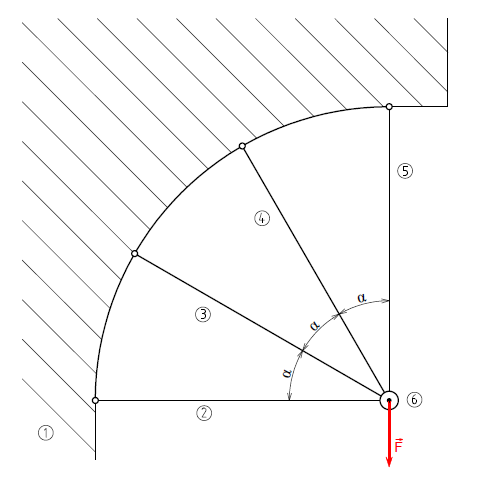

In [2]:
Image(filename='Tah2a.PNG', width = 600, height=300)

Úplné uvoľnenie prútovej sústavy

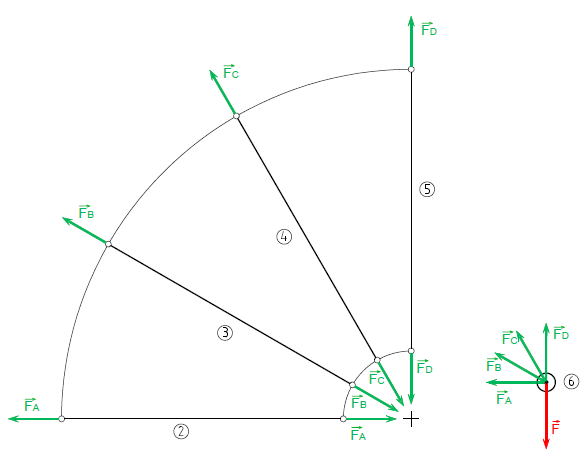

In [3]:
Image(filename='Tah2b.PNG', width = 600, height=300)

Zo statickej rovnováhy vyplýva, že máme dve použiteľné rovnice pre teleso 6 a 4 neznáme, takže je daná úloha 2x staticky neurčitá a je nutné previesť čiastočné uvoľnenie, ktoré bolo realizované takýto spôsobom

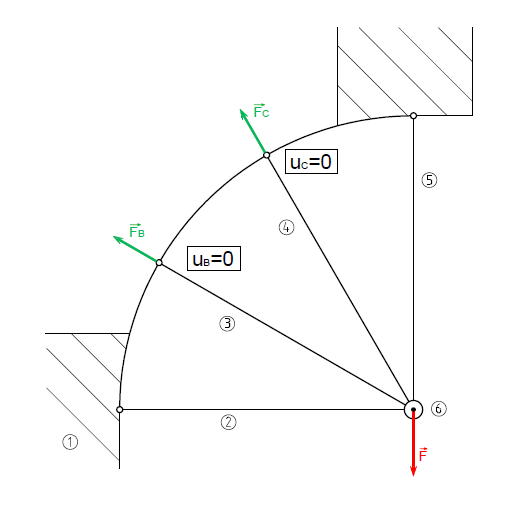

In [4]:
Image(filename='Tah2c.PNG', width = 600, height=300)

Zavedenie premenných v podobe symbolov potrebných pre výpočet:

In [5]:
F,FA,FB,FC,FD=sp.symbols('F F_A F_B F_C F_D')
E,d,R=sp.symbols('E d R')
x = sp.symbols('x')
alfa=sp.symbols('alpha')

Vyjadrenie plochy priečneho prierezu:

In [6]:
S = sp.pi*d**2/4
S

Výsledné stykové sily určíme z použiteľných podmienok statickej rovnováhy a deformačných podmienok vyjadrených v silovom tvare pre teleso 6

In [7]:
Fx= - FA - FB*sp.cos(30) - FC*sp.cos(60)
Fy= FB*sp.sin(30) + FC*sp.sin(60) +FD - F
Fx, Fy

Vyjadríme neznáme sily $F_A$ a $F_D$ v závislosti na parametroch $F_B$ a $F_C$

In [8]:
FA =- FB*sp.cos(30) -FC*sp.cos(60)
FD = F - FB*sp.sin(30) - FC*sp.sin(60)
FA,FD

Určenie výsledných vnútorných účinkov:

In [9]:
N2 = FA
N3 = FB
N4 = FC
N5 = FD
N2,N3,N4,N5

In [10]:
dN2b=N2.diff(FB)
dN3b=N3.diff(FB)
dN4b=N4.diff(FB)
dN5b=N5.diff(FB)
dN2c=N2.diff(FC)
dN3c=N3.diff(FC)
dN4c=N4.diff(FC)
dN5c=N5.diff(FC)

Z dôvodu, že je uloženie danej sústavy dvakrát staticky neurčité zavedieme deformačné podmienky v tvare: 

\begin{align*}
u_B = &\frac{\partial{W}}{\partial{F_B}} = 0\\
u_C = &\frac{\partial{W}}{\partial{F_C}}= 0\\
\end{align*}

Energia napätosti sústavy je teda:

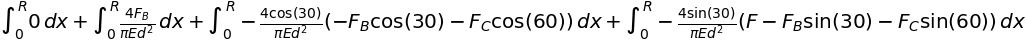

In [11]:
dW2b = N2*dN2b/(E*S)
dW3b = N3*dN3b/(E*S)
dW4b = N4*dN4b/(E*S)
dW5b = N5*dN5b/(E*S)
dWFB = sp.Integral(dW2b,[x,0,R]) + sp.Integral(dW3b,[x,0,R]) + sp.Integral(dW4b,[x,0,R]) + sp.Integral(dW5b,[x,0,R])
dWFB

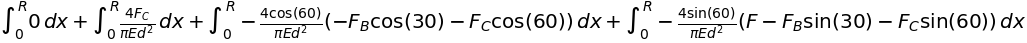

In [12]:
dW2c = N2*dN2c/(E*S)
dW3c = N3*dN3c/(E*S)
dW4c = N4*dN4c/(E*S)
dW5c = N5*dN5c/(E*S)
dWFC = sp.Integral(dW2c,[x,0,R]) + sp.Integral(dW3c,[x,0,R]) + sp.Integral(dW4c,[x,0,R]) + sp.Integral(dW5c,[x,0,R])
dWFC

Deformačné podmienky:

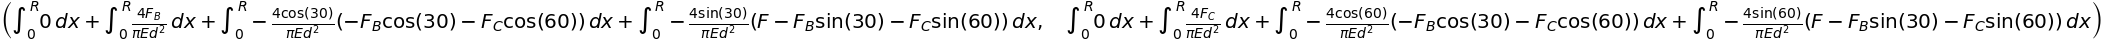

In [13]:
uB= dWFB
uC= dWFC
uB, uC

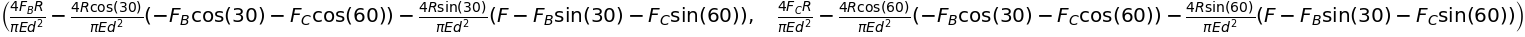

In [14]:
uBi=uB.doit()
uCi=uC.doit()
uBi,uCi

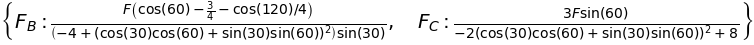

In [15]:
vysledok=sp.solve([uBi,uCi],[FB,FC])
vysledok

Prevedieme kontrolu voči medznému stavu pružnosti pre zaťažený stav so vstupnými údajmi:

\begin{align*}
F = & \, 1,5x10^5 \, N\\
R = & \, 1000\,mm\\
\end{align*}

In [16]:
R_=1.
d_,E_,F_=0.03, 2.1e11, 1.5e5

Vyjadrenie neznámych síl $F_B$ a $F_C$ v zaťaženom stave

In [17]:
FBp=vysledok[FB].subs({R:R_,E:E_,d:d_,F:F_})
FCp=vysledok[FC].subs({R:R_,E:E_,d:d_,F:F_})
round(float(FBp),2), round(float(FCp),2)

Dopočítanie zvyšných síl $F_A$ a $F_D$ pre daný stav

In [18]:
FAp=float(FA.subs({FB:FBp,FC:FCp}))
FDp=float(FD.subs({FB:FBp,FC:FCp,F:F_}))
round(FAp,2), round(FDp,2)

Vyčíslenie plochy priečneho prierezu:

In [19]:
S_=S.subs(d,d_)
float(S_)

Určenie napätí v jendotlivých prútoch v zaťaženom stave pomocou vzťahu $$\sigma = \frac{N}{S}$$

In [20]:
sigma1p=FAp/S_
sigma2p=FBp/S_
sigma3p=FCp/S_
sigma4p=FDp/S_
round(float(sigma1p),2), round(float(sigma2p),2), round(float(sigma3p),2), round(float(sigma4p),2)